In [1]:
import pandas as pd
import numpy as np
import gensim as gs

In [2]:
dcal = pd.read_csv("cleansed_dcal_data.csv")
dcal.head()

,Unnamed: 0,url,Rating,Review_Title,User_Nb_Reviews,User_Name,User_Country,Review_Date,Trip_Verified,Airline_Name,Review_Text_Clean,Type_Of_Traveller,Cabin_Flown,Date Flown,Recommended
0,0,http://www.airlinequality.com/airline-reviews/...,1,"""disorganized and inefficient""",NaN,A Adam,United States,26th May 2018,Trip Verified,indigo-airlines,Dehradun to Pune via Delhi. Most disorganized...,Solo Leisure,Economy Class,May 2018,no
1,1,http://www.airlinequality.com/airline-reviews/...,1,"""an excess baggage of 5kg""",NaN,J Masim,India,20th May 2018,Trip Verified,indigo-airlines,Doha to Kochi. The check in staff were unprof...,Solo Leisure,Economy Class,May 2018,no
2,2,http://www.airlinequality.com/airline-reviews/...,9,"""a value for money indeed""",1 reviews,Arindam Mahapatra,India,16th May 2018,Trip Verified,indigo-airlines,"Bhubaneshwar to Mumbai. IndiGo, being a low-c...",Solo Leisure,Economy Class,January 2018,yes
3,3,http://www.airlinequality.com/airline-reviews/...,10,"""happy with this sweet gestue""",NaN,Kiranraj Nayak,India,14th May 2018,Trip Verified,indigo-airlines,Me and my wife were travelling to Bangalore f...,Family Leisure,Economy Class,March 2018,yes
4,4,http://www.airlinequality.com/airline-reviews/...,10,"""such caring staff""",NaN,Dr Bhawna Johri,India,12th May 2018,Trip Verified,indigo-airlines,Flew Coimbatore to Delhi. First of all thank ...,Family Leisure,Economy Class,April 2018,no


In [3]:
indigo_neg = dcal[(dcal["Airline_Name"] == "indigo-airlines") & (dcal["Recommended"] == "no")]
indigo_pos = dcal[(dcal["Airline_Name"] == "indigo-airlines") & (dcal["Recommended"] == "yes")]

spicejet_neg = dcal[(dcal["Airline_Name"] == "spicejet") & (dcal["Recommended"] == "no")]
spicejet_pos = dcal[(dcal["Airline_Name"] == "spicejet") & (dcal["Recommended"] == "yes")]

airasia_neg = dcal[(dcal["Airline_Name"] == "airasia") & (dcal["Recommended"] == "no")]
airasia_pos = dcal[(dcal["Airline_Name"] == "airasia") & (dcal["Recommended"] == "yes")]

easyjet_neg = dcal[(dcal["Airline_Name"] == "easyjet") & (dcal["Recommended"] == "no")]
easyjet_pos = dcal[(dcal["Airline_Name"] == "easyjet") & (dcal["Recommended"] == "yes")]

ryanair_neg = dcal[(dcal["Airline_Name"] == "ryanair") & (dcal["Recommended"] == "no")]
ryanair_pos = dcal[(dcal["Airline_Name"] == "ryanair") & (dcal["Recommended"] == "yes")]

southwest_neg = dcal[(dcal["Airline_Name"] == "southwest-airlines") & (dcal["Recommended"] == "no")]
southwest_pos = dcal[(dcal["Airline_Name"] == "southwest-airlines") & (dcal["Recommended"] == "yes")]


In [4]:
import spacy

In [5]:
indigo_neg.index

Int64Index([  0,   1,   4,   5,   7,   8,   9,  10,  11,  12,  20,  23,  24,
             25,  27,  29,  31,  32,  35,  36,  38,  40,  42,  45,  46,  47,
             50,  51,  53,  55,  60,  71,  72,  78,  81,  84,  95, 103, 104,
            105, 110, 120, 122, 133, 134, 137, 140, 175, 177, 179, 183],
           dtype='int64')

In [6]:
df = indigo_neg
df = (df.set_index(df.columns.drop('Review_Text_Clean',1).tolist()).Review_Text_Clean.str.split('.', expand=True).stack().reset_index().rename(columns={0:'Review_Text_Clean'}).loc[:, df.columns])
indigo_neg_sen = df
indigo_neg_sen.head()

,Unnamed: 0,url,Rating,Review_Title,User_Nb_Reviews,User_Name,User_Country,Review_Date,Trip_Verified,Airline_Name,Review_Text_Clean,Type_Of_Traveller,Cabin_Flown,Date Flown,Recommended
0,0,http://www.airlinequality.com/airline-reviews/...,1,"""disorganized and inefficient""",NaN,A Adam,United States,26th May 2018,Trip Verified,indigo-airlines,Dehradun to Pune via Delhi,Solo Leisure,Economy Class,May 2018,no
1,0,http://www.airlinequality.com/airline-reviews/...,1,"""disorganized and inefficient""",NaN,A Adam,United States,26th May 2018,Trip Verified,indigo-airlines,Most disorganized and inefficient airline I h...,Solo Leisure,Economy Class,May 2018,no
2,0,http://www.airlinequality.com/airline-reviews/...,1,"""disorganized and inefficient""",NaN,A Adam,United States,26th May 2018,Trip Verified,indigo-airlines,"Multiple delays, standing in line for over 8+...",Solo Leisure,Economy Class,May 2018,no
3,0,http://www.airlinequality.com/airline-reviews/...,1,"""disorganized and inefficient""",NaN,A Adam,United States,26th May 2018,Trip Verified,indigo-airlines,Do not fly with this airline,Solo Leisure,Economy Class,May 2018,no
4,0,http://www.airlinequality.com/airline-reviews/...,1,"""disorganized and inefficient""",NaN,A Adam,United States,26th May 2018,Trip Verified,indigo-airlines,,Solo Leisure,Economy Class,May 2018,no


In [7]:
df = indigo_pos
df = (df.set_index(df.columns.drop('Review_Text_Clean',1).tolist()).Review_Text_Clean.str.split('.', expand=True).stack().reset_index().rename(columns={0:'Review_Text_Clean'}).loc[:, df.columns])
indigo_pos_sen = df
indigo_pos_sen.head()

,Unnamed: 0,url,Rating,Review_Title,User_Nb_Reviews,User_Name,User_Country,Review_Date,Trip_Verified,Airline_Name,Review_Text_Clean,Type_Of_Traveller,Cabin_Flown,Date Flown,Recommended
0,2,http://www.airlinequality.com/airline-reviews/...,9,"""a value for money indeed""",1 reviews,Arindam Mahapatra,India,16th May 2018,Trip Verified,indigo-airlines,Bhubaneshwar to Mumbai,Solo Leisure,Economy Class,January 2018,yes
1,2,http://www.airlinequality.com/airline-reviews/...,9,"""a value for money indeed""",1 reviews,Arindam Mahapatra,India,16th May 2018,Trip Verified,indigo-airlines,"IndiGo, being a low-cost no-frills airline is...",Solo Leisure,Economy Class,January 2018,yes
2,2,http://www.airlinequality.com/airline-reviews/...,9,"""a value for money indeed""",1 reviews,Arindam Mahapatra,India,16th May 2018,Trip Verified,indigo-airlines,Although their in-flight menu is bit expensiv...,Solo Leisure,Economy Class,January 2018,yes
3,2,http://www.airlinequality.com/airline-reviews/...,9,"""a value for money indeed""",1 reviews,Arindam Mahapatra,India,16th May 2018,Trip Verified,indigo-airlines,"From ground handling to the crews' services, ...",Solo Leisure,Economy Class,January 2018,yes
4,2,http://www.airlinequality.com/airline-reviews/...,9,"""a value for money indeed""",1 reviews,Arindam Mahapatra,India,16th May 2018,Trip Verified,indigo-airlines,The students fare scheme is a boon indeed,Solo Leisure,Economy Class,January 2018,yes


In [8]:
df = spicejet_neg
df = (df.set_index(df.columns.drop('Review_Text_Clean',1).tolist()).Review_Text_Clean.str.split('.', expand=True).stack().reset_index().rename(columns={0:'Review_Text_Clean'}).loc[:, df.columns])
spicejet_neg_sen = df
spicejet_neg_sen.head()

,Unnamed: 0,url,Rating,Review_Title,User_Nb_Reviews,User_Name,User_Country,Review_Date,Trip_Verified,Airline_Name,Review_Text_Clean,Type_Of_Traveller,Cabin_Flown,Date Flown,Recommended
0,205,http://www.airlinequality.com/airline-reviews/...,1,"""disappointed with the service""",NaN,Ramesh Khandelwal,India,10th June 2018,Trip Verified,spicejet,Jaipur to Hyderabad,Couple Leisure,Economy Class,June 2018,no
1,205,http://www.airlinequality.com/airline-reviews/...,1,"""disappointed with the service""",NaN,Ramesh Khandelwal,India,10th June 2018,Trip Verified,spicejet,"Too bad experience, as my schedule is ruined",Couple Leisure,Economy Class,June 2018,no
2,205,http://www.airlinequality.com/airline-reviews/...,1,"""disappointed with the service""",NaN,Ramesh Khandelwal,India,10th June 2018,Trip Verified,spicejet,My flight was on 9,Couple Leisure,Economy Class,June 2018,no
3,205,http://www.airlinequality.com/airline-reviews/...,1,"""disappointed with the service""",NaN,Ramesh Khandelwal,India,10th June 2018,Trip Verified,spicejet,"15 pm on 8th june, but in evening 4pm I receiv...",Couple Leisure,Economy Class,June 2018,no
4,205,http://www.airlinequality.com/airline-reviews/...,1,"""disappointed with the service""",NaN,Ramesh Khandelwal,India,10th June 2018,Trip Verified,spicejet,Then about 5pm I received another notificatio...,Couple Leisure,Economy Class,June 2018,no


In [9]:
df = spicejet_pos
df = (df.set_index(df.columns.drop('Review_Text_Clean',1).tolist()).Review_Text_Clean.str.split('.', expand=True).stack().reset_index().rename(columns={0:'Review_Text_Clean'}).loc[:, df.columns])
spicejet_pos_sen = df
spicejet_pos_sen.head()

,Unnamed: 0,url,Rating,Review_Title,User_Nb_Reviews,User_Name,User_Country,Review_Date,Trip_Verified,Airline_Name,Review_Text_Clean,Type_Of_Traveller,Cabin_Flown,Date Flown,Recommended
0,208,http://www.airlinequality.com/airline-reviews/...,8,"""I will fly again""",2 reviews,Francisco Fernandes,India,28th May 2018,Trip Verified,spicejet,Pune to Dubai,Couple Leisure,Economy Class,April 2018,yes
1,208,http://www.airlinequality.com/airline-reviews/...,8,"""I will fly again""",2 reviews,Francisco Fernandes,India,28th May 2018,Trip Verified,spicejet,Departure and arrival on time,Couple Leisure,Economy Class,April 2018,yes
2,208,http://www.airlinequality.com/airline-reviews/...,8,"""I will fly again""",2 reviews,Francisco Fernandes,India,28th May 2018,Trip Verified,spicejet,Checkin at Pune airport was quick,Couple Leisure,Economy Class,April 2018,yes
3,208,http://www.airlinequality.com/airline-reviews/...,8,"""I will fly again""",2 reviews,Francisco Fernandes,India,28th May 2018,Trip Verified,spicejet,New aircraft and clean interior and toilets,Couple Leisure,Economy Class,April 2018,yes
4,208,http://www.airlinequality.com/airline-reviews/...,8,"""I will fly again""",2 reviews,Francisco Fernandes,India,28th May 2018,Trip Verified,spicejet,I paid Rs 300 for chicken meal and was good,Couple Leisure,Economy Class,April 2018,yes


In [10]:
df = airasia_neg
df = (df.set_index(df.columns.drop('Review_Text_Clean',1).tolist()).Review_Text_Clean.str.split('.', expand=True).stack().reset_index().rename(columns={0:'Review_Text_Clean'}).loc[:, df.columns])
airasia_neg_sen = df
airasia_neg_sen.head()

,Unnamed: 0,url,Rating,Review_Title,User_Nb_Reviews,User_Name,User_Country,Review_Date,Trip_Verified,Airline_Name,Review_Text_Clean,Type_Of_Traveller,Cabin_Flown,Date Flown,Recommended
0,2992,http://www.airlinequality.com/airline-reviews/...,1,"""I end up with normal seat""",NaN,D Lansson,Hong Kong,17th May 2018,Trip Verified,airasia,Hong Kong to Phuket,Family Leisure,Economy Class,February 2018,no
1,2992,http://www.airlinequality.com/airline-reviews/...,1,"""I end up with normal seat""",NaN,D Lansson,Hong Kong,17th May 2018,Trip Verified,airasia,I booked the premium flex ticket to get good ...,Family Leisure,Economy Class,February 2018,no
2,2992,http://www.airlinequality.com/airline-reviews/...,1,"""I end up with normal seat""",NaN,D Lansson,Hong Kong,17th May 2018,Trip Verified,airasia,I was advised that this type of ticket allowe...,Family Leisure,Economy Class,February 2018,no
3,2992,http://www.airlinequality.com/airline-reviews/...,1,"""I end up with normal seat""",NaN,D Lansson,Hong Kong,17th May 2018,Trip Verified,airasia,I needed to change my flight date more than a...,Family Leisure,Economy Class,February 2018,no
4,2992,http://www.airlinequality.com/airline-reviews/...,1,"""I end up with normal seat""",NaN,D Lansson,Hong Kong,17th May 2018,Trip Verified,airasia,I tried for days to access my booking on Aira...,Family Leisure,Economy Class,February 2018,no


In [11]:
df = airasia_pos
df = (df.set_index(df.columns.drop('Review_Text_Clean',1).tolist()).Review_Text_Clean.str.split('.', expand=True).stack().reset_index().rename(columns={0:'Review_Text_Clean'}).loc[:, df.columns])
airasia_pos_sen = df
airasia_pos_sen.head()

,Unnamed: 0,url,Rating,Review_Title,User_Nb_Reviews,User_Name,User_Country,Review_Date,Trip_Verified,Airline_Name,Review_Text_Clean,Type_Of_Traveller,Cabin_Flown,Date Flown,Recommended
0,2990,http://www.airlinequality.com/airline-reviews/...,7,"""flight with AirAsia was a good one""",NaN,D Tan,Singapore,27th May 2018,Trip Verified,airasia,My flight with AirAsia was from Singapore to ...,Family Leisure,Economy Class,May 2018,yes
1,2990,http://www.airlinequality.com/airline-reviews/...,7,"""flight with AirAsia was a good one""",NaN,D Tan,Singapore,27th May 2018,Trip Verified,airasia,Boarding was slow but we reached Penang befor...,Family Leisure,Economy Class,May 2018,yes
2,2990,http://www.airlinequality.com/airline-reviews/...,7,"""flight with AirAsia was a good one""",NaN,D Tan,Singapore,27th May 2018,Trip Verified,airasia,Cabin crew were friendly and were eager in he...,Family Leisure,Economy Class,May 2018,yes
3,2990,http://www.airlinequality.com/airline-reviews/...,7,"""flight with AirAsia was a good one""",NaN,D Tan,Singapore,27th May 2018,Trip Verified,airasia,Seat was okay,Family Leisure,Economy Class,May 2018,yes
4,2990,http://www.airlinequality.com/airline-reviews/...,7,"""flight with AirAsia was a good one""",NaN,D Tan,Singapore,27th May 2018,Trip Verified,airasia,"Overall, the flight with AirAsia was a good one",Family Leisure,Economy Class,May 2018,yes


In [12]:
df = easyjet_neg
df = (df.set_index(df.columns.drop('Review_Text_Clean',1).tolist()).Review_Text_Clean.str.split('.', expand=True).stack().reset_index().rename(columns={0:'Review_Text_Clean'}).loc[:, df.columns])
easyjet_neg_sen = df
easyjet_neg_sen.head()

,Unnamed: 0,url,Rating,Review_Title,User_Nb_Reviews,User_Name,User_Country,Review_Date,Trip_Verified,Airline_Name,Review_Text_Clean,Type_Of_Traveller,Cabin_Flown,Date Flown,Recommended
0,2165,http://www.airlinequality.com/airline-reviews/...,1,"""No reimbursement received""",NaN,H Keane,United Kingdom,8th June 2018,Trip Verified,easyjet,Gibraltar to Manchester flight cancelled on 2...,Family Leisure,Economy Class,April 2018,no
1,2165,http://www.airlinequality.com/airline-reviews/...,1,"""No reimbursement received""",NaN,H Keane,United Kingdom,8th June 2018,Trip Verified,easyjet,"We were a party of 9 (myself, my partner, 3 s...",Family Leisure,Economy Class,April 2018,no
2,2165,http://www.airlinequality.com/airline-reviews/...,1,"""No reimbursement received""",NaN,H Keane,United Kingdom,8th June 2018,Trip Verified,easyjet,No assistance from easyJet ground crew in fin...,Family Leisure,Economy Class,April 2018,no
3,2165,http://www.airlinequality.com/airline-reviews/...,1,"""No reimbursement received""",NaN,H Keane,United Kingdom,8th June 2018,Trip Verified,easyjet,Managed to get a flight from Malaga to Doncas...,Family Leisure,Economy Class,April 2018,no
4,2165,http://www.airlinequality.com/airline-reviews/...,1,"""No reimbursement received""",NaN,H Keane,United Kingdom,8th June 2018,Trip Verified,easyjet,This really was the very best we could get,Family Leisure,Economy Class,April 2018,no


In [13]:
df = easyjet_pos
df = (df.set_index(df.columns.drop('Review_Text_Clean',1).tolist()).Review_Text_Clean.str.split('.', expand=True).stack().reset_index().rename(columns={0:'Review_Text_Clean'}).loc[:, df.columns])
easyjet_pos_sen = df
easyjet_pos_sen.head()

,Unnamed: 0,url,Rating,Review_Title,User_Nb_Reviews,User_Name,User_Country,Review_Date,Trip_Verified,Airline_Name,Review_Text_Clean,Type_Of_Traveller,Cabin_Flown,Date Flown,Recommended
0,2164,http://www.airlinequality.com/airline-reviews/...,10,"""one hour later than scheduled""",NaN,Sarah Tarmey,United Kingdom,9th June 2018,Trip Verified,easyjet,21,Couple Leisure,Economy Class,June 2018,yes
1,2164,http://www.airlinequality.com/airline-reviews/...,10,"""one hour later than scheduled""",NaN,Sarah Tarmey,United Kingdom,9th June 2018,Trip Verified,easyjet,55 flight from Paris to Luton,Couple Leisure,Economy Class,June 2018,yes
2,2164,http://www.airlinequality.com/airline-reviews/...,10,"""one hour later than scheduled""",NaN,Sarah Tarmey,United Kingdom,9th June 2018,Trip Verified,easyjet,Flight delayed as staff unable to disembark t...,Couple Leisure,Economy Class,June 2018,yes
3,2164,http://www.airlinequality.com/airline-reviews/...,10,"""one hour later than scheduled""",NaN,Sarah Tarmey,United Kingdom,9th June 2018,Trip Verified,easyjet,After 45 minutes one wheelchair was located a...,Couple Leisure,Economy Class,June 2018,yes
4,2164,http://www.airlinequality.com/airline-reviews/...,10,"""one hour later than scheduled""",NaN,Sarah Tarmey,United Kingdom,9th June 2018,Trip Verified,easyjet,My flight left one hour later than scheduled ...,Couple Leisure,Economy Class,June 2018,yes


In [14]:
df = ryanair_neg
df = (df.set_index(df.columns.drop('Review_Text_Clean',1).tolist()).Review_Text_Clean.str.split('.', expand=True).stack().reset_index().rename(columns={0:'Review_Text_Clean'}).loc[:, df.columns])
ryanair_neg_sen = df
ryanair_neg_sen.head()

,Unnamed: 0,url,Rating,Review_Title,User_Nb_Reviews,User_Name,User_Country,Review_Date,Trip_Verified,Airline_Name,Review_Text_Clean,Type_Of_Traveller,Cabin_Flown,Date Flown,Recommended
0,344,http://www.airlinequality.com/airline-reviews/...,1,"""most unhelpful customer service""",NaN,O Meerden,Canada,11th June 2018,Trip Verified,ryanair,Madrid to Sofia,Couple Leisure,Economy Class,June 2018,no
1,344,http://www.airlinequality.com/airline-reviews/...,1,"""most unhelpful customer service""",NaN,O Meerden,Canada,11th June 2018,Trip Verified,ryanair,The most unhelpful customer service ever! Wha...,Couple Leisure,Economy Class,June 2018,no
2,344,http://www.airlinequality.com/airline-reviews/...,1,"""most unhelpful customer service""",NaN,O Meerden,Canada,11th June 2018,Trip Verified,ryanair,"If you can, save yourself the headache and ch...",Couple Leisure,Economy Class,June 2018,no
3,344,http://www.airlinequality.com/airline-reviews/...,1,"""most unhelpful customer service""",NaN,O Meerden,Canada,11th June 2018,Trip Verified,ryanair,Talking to Ryanair's support staff was like t...,Couple Leisure,Economy Class,June 2018,no
4,344,http://www.airlinequality.com/airline-reviews/...,1,"""most unhelpful customer service""",NaN,O Meerden,Canada,11th June 2018,Trip Verified,ryanair,They are trained to copy and paste generic re...,Couple Leisure,Economy Class,June 2018,no


In [15]:
df = ryanair_pos
df = (df.set_index(df.columns.drop('Review_Text_Clean',1).tolist()).Review_Text_Clean.str.split('.', expand=True).stack().reset_index().rename(columns={0:'Review_Text_Clean'}).loc[:, df.columns])
ryanair_pos_sen = df
ryanair_pos_sen.head()

,Unnamed: 0,url,Rating,Review_Title,User_Nb_Reviews,User_Name,User_Country,Review_Date,Trip_Verified,Airline_Name,Review_Text_Clean,Type_Of_Traveller,Cabin_Flown,Date Flown,Recommended
0,347,http://www.airlinequality.com/airline-reviews/...,6,"""price can't be beaten""",NaN,Patricia Castleman,United Kingdom,10th June 2018,Trip Verified,ryanair,Alicante to East Midlands,Couple Leisure,Economy Class,June 2018,yes
1,347,http://www.airlinequality.com/airline-reviews/...,6,"""price can't be beaten""",NaN,Patricia Castleman,United Kingdom,10th June 2018,Trip Verified,ryanair,Ryanair is a budget airline that i use on a r...,Couple Leisure,Economy Class,June 2018,yes
2,347,http://www.airlinequality.com/airline-reviews/...,6,"""price can't be beaten""",NaN,Patricia Castleman,United Kingdom,10th June 2018,Trip Verified,ryanair,I choose them because of price only and if yo...,Couple Leisure,Economy Class,June 2018,yes
3,347,http://www.airlinequality.com/airline-reviews/...,6,"""price can't be beaten""",NaN,Patricia Castleman,United Kingdom,10th June 2018,Trip Verified,ryanair,,Couple Leisure,Economy Class,June 2018,yes
4,366,http://www.airlinequality.com/airline-reviews/...,8,"""amazing service""",NaN,Paul Dorrington,United Kingdom,15th May 2018,Trip Verified,ryanair,Krakow to Stansted,Family Leisure,Economy Class,May 2018,yes


In [16]:
df = southwest_neg
df = (df.set_index(df.columns.drop('Review_Text_Clean',1).tolist()).Review_Text_Clean.str.split('.', expand=True).stack().reset_index().rename(columns={0:'Review_Text_Clean'}).loc[:, df.columns])
southwest_neg_sen = df
southwest_neg_sen.head()

,Unnamed: 0,url,Rating,Review_Title,User_Nb_Reviews,User_Name,User_Country,Review_Date,Trip_Verified,Airline_Name,Review_Text_Clean,Type_Of_Traveller,Cabin_Flown,Date Flown,Recommended
0,1504,http://www.airlinequality.com/airline-reviews/...,2,"""Not impressed at all""",NaN,Jamie Jordan,United States,10th June 2018,Trip Verified,southwest-airlines,Portland to Nashville via Baltimore,Solo Leisure,Economy Class,June 2018,no
1,1504,http://www.airlinequality.com/airline-reviews/...,2,"""Not impressed at all""",NaN,Jamie Jordan,United States,10th June 2018,Trip Verified,southwest-airlines,I am disappointed in this airline and never g...,Solo Leisure,Economy Class,June 2018,no
2,1504,http://www.airlinequality.com/airline-reviews/...,2,"""Not impressed at all""",NaN,Jamie Jordan,United States,10th June 2018,Trip Verified,southwest-airlines,In the past few years that I’ve flown with So...,Solo Leisure,Economy Class,June 2018,no
3,1504,http://www.airlinequality.com/airline-reviews/...,2,"""Not impressed at all""",NaN,Jamie Jordan,United States,10th June 2018,Trip Verified,southwest-airlines,"Today, they delayed my flight so much that I ...",Solo Leisure,Economy Class,June 2018,no
4,1504,http://www.airlinequality.com/airline-reviews/...,2,"""Not impressed at all""",NaN,Jamie Jordan,United States,10th June 2018,Trip Verified,southwest-airlines,The placed me on one of the latest flights to...,Solo Leisure,Economy Class,June 2018,no


In [17]:
df = southwest_pos
df = (df.set_index(df.columns.drop('Review_Text_Clean',1).tolist()).Review_Text_Clean.str.split('.', expand=True).stack().reset_index().rename(columns={0:'Review_Text_Clean'}).loc[:, df.columns])
southwest_pos_sen = df
southwest_pos_sen.head()

,Unnamed: 0,url,Rating,Review_Title,User_Nb_Reviews,User_Name,User_Country,Review_Date,Trip_Verified,Airline_Name,Review_Text_Clean,Type_Of_Traveller,Cabin_Flown,Date Flown,Recommended
0,1506,http://www.airlinequality.com/airline-reviews/...,3,"""I’m very disappointed""",NaN,M Lee,United States,2nd June 2018,Trip Verified,southwest-airlines,Oakland to Orange County,Solo Leisure,Economy Class,June 2018,yes
1,1506,http://www.airlinequality.com/airline-reviews/...,3,"""I’m very disappointed""",NaN,M Lee,United States,2nd June 2018,Trip Verified,southwest-airlines,10 out of the 12 flights I had with Southwest...,Solo Leisure,Economy Class,June 2018,yes
2,1506,http://www.airlinequality.com/airline-reviews/...,3,"""I’m very disappointed""",NaN,M Lee,United States,2nd June 2018,Trip Verified,southwest-airlines,I’m very disappointed since a chunk of my tim...,Solo Leisure,Economy Class,June 2018,yes
3,1506,http://www.airlinequality.com/airline-reviews/...,3,"""I’m very disappointed""",NaN,M Lee,United States,2nd June 2018,Trip Verified,southwest-airlines,"I always fly out from Oakland to either SNA, ...",Solo Leisure,Economy Class,June 2018,yes
4,1506,http://www.airlinequality.com/airline-reviews/...,3,"""I’m very disappointed""",NaN,M Lee,United States,2nd June 2018,Trip Verified,southwest-airlines,I’ve been a loyal customer for 4,Solo Leisure,Economy Class,June 2018,yes


In [18]:
#nlp = spacy.load('en_core_web_lg')

In [19]:
#doc1 = nlp(indigo_neg_sen["Review_Text_Clean"][1])

In [20]:
# for token in doc1:
#     print(token.text, token.has_vector, len(token.vector))

In [21]:
from gensim.parsing.preprocessing import remove_stopwords

In [22]:
indigo_neg_sen["tokennized_review_sen"] = indigo_neg_sen["Review_Text_Clean"].apply(lambda line: gs.utils.simple_preprocess(remove_stopwords(line)))
model_indigo_neg = gs.models.Word2Vec(indigo_neg_sen["tokennized_review_sen"].tolist(), size = 200, window = 8, min_count=1, workers = 4)
indigo_pos_sen["tokennized_review_sen"] = indigo_pos_sen["Review_Text_Clean"].apply(lambda line: gs.utils.simple_preprocess(remove_stopwords(line)))
model_indigo_pos = gs.models.Word2Vec(indigo_pos_sen["tokennized_review_sen"].tolist(),  size = 200, window = 8, min_count=1, workers = 4)

In [23]:
spicejet_neg_sen["tokennized_review_sen"] = spicejet_neg_sen["Review_Text_Clean"].apply(lambda line: gs.utils.simple_preprocess(remove_stopwords(line)))
model_spicejet_neg = gs.models.Word2Vec(spicejet_neg_sen["tokennized_review_sen"].tolist(),  size = 200, window = 8, min_count=1, workers = 4)
spicejet_pos_sen["tokennized_review_sen"] = spicejet_pos_sen["Review_Text_Clean"].apply(lambda line: gs.utils.simple_preprocess(remove_stopwords(line)))
model_spicejet_pos = gs.models.Word2Vec(spicejet_pos_sen["tokennized_review_sen"].tolist(),  size = 200, window = 8, min_count=1, workers = 4)

In [24]:
easyjet_neg_sen["tokennized_review_sen"] = easyjet_neg_sen["Review_Text_Clean"].apply(lambda line: gs.utils.simple_preprocess(remove_stopwords(line)))
model_easyjet_neg = gs.models.Word2Vec(easyjet_neg_sen["tokennized_review_sen"].tolist(),  size = 200, window = 8, min_count=1, workers = 4)
easyjet_pos_sen["tokennized_review_sen"] = easyjet_pos_sen["Review_Text_Clean"].apply(lambda line: gs.utils.simple_preprocess(remove_stopwords(line)))
model_easyjet_pos = gs.models.Word2Vec(easyjet_pos_sen["tokennized_review_sen"].tolist(),  size = 200, window = 8, min_count=1, workers = 4)

In [25]:
ryanair_neg_sen["tokennized_review_sen"] = ryanair_neg_sen["Review_Text_Clean"].apply(lambda line: gs.utils.simple_preprocess(remove_stopwords(line)))
model_ryanair_neg = gs.models.Word2Vec(ryanair_neg_sen["tokennized_review_sen"].tolist(),  size = 200, window = 8, min_count=1, workers = 4)
ryanair_pos_sen["tokennized_review_sen"] = ryanair_pos_sen["Review_Text_Clean"].apply(lambda line: gs.utils.simple_preprocess(remove_stopwords(line)))
model_ryanair_pos = gs.models.Word2Vec(ryanair_pos_sen["tokennized_review_sen"].tolist(),  size = 200, window = 8, min_count=1, workers = 4)

In [26]:
airasia_neg_sen["tokennized_review_sen"] = airasia_neg_sen["Review_Text_Clean"].apply(lambda line: gs.utils.simple_preprocess(remove_stopwords(line)))
model_airasia_neg = gs.models.Word2Vec(airasia_neg_sen["tokennized_review_sen"].tolist(),  size = 200, window = 8, min_count=1, workers = 4)
airasia_pos_sen["tokennized_review_sen"] = airasia_pos_sen["Review_Text_Clean"].apply(lambda line: gs.utils.simple_preprocess(remove_stopwords(line)))
model_airasia_pos = gs.models.Word2Vec(airasia_pos_sen["tokennized_review_sen"].tolist(),  size = 200, window = 8, min_count=1, workers = 4)

In [27]:
southwest_neg_sen["tokennized_review_sen"] = southwest_neg_sen["Review_Text_Clean"].apply(lambda line: gs.utils.simple_preprocess(remove_stopwords(line)))
model_southwest_neg = gs.models.Word2Vec(southwest_neg_sen["tokennized_review_sen"].tolist(),  size = 200, window = 8, min_count=1, workers = 4)
southwest_pos_sen["tokennized_review_sen"] = southwest_pos_sen["Review_Text_Clean"].apply(lambda line: gs.utils.simple_preprocess(remove_stopwords(line)))
model_southwest_pos = gs.models.Word2Vec(southwest_pos_sen["tokennized_review_sen"].tolist(),  size = 200, window = 8, min_count=1, workers = 4)

In [28]:
print(model_ryanair_neg["cabin"])

[ 0.06483235 -0.15430854  0.06981341 -0.0869188  -0.1189028   0.06315377
  0.49851254  0.404147   -0.27430487 -0.09452108 -0.07601047 -0.25950155
  0.0549177   0.10689617 -0.2914948  -0.20184427 -0.1541219  -0.08419918
 -0.01524868  0.11622442  0.03503279  0.03533022  0.23332283 -0.12481856
 -0.26339942 -0.07186519 -0.44708306  0.20752011  0.2299416   0.2775085
  0.18790501 -0.1853665  -0.31955102  0.01078994 -0.22872412  0.06773741
  0.34188876 -0.07849552 -0.07149664  0.1106627  -0.25073722 -0.09706365
 -0.28108945  0.0392587  -0.16121584  0.11577439 -0.19286516 -0.35669473
  0.11333357  0.08583314 -0.38253796 -0.25492352 -0.06855052 -0.3133397
  0.4911737  -0.43580577  0.13795674  0.13690141  0.1818346  -0.17444052
 -0.06341062 -0.6792671   0.17285231 -0.1861809   0.378287    0.06917758
 -0.17115237  0.60443634  0.22214822 -0.7129948  -0.16885215  0.25933254
  0.17361724  0.46896216 -0.02092668 -0.44057447  0.39467338  0.25497705
  0.38588822 -0.12096993 -0.37874502 -0.02280818  0.0

/Users/vrathod/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [29]:
model_indigo_neg.wv.most_similar(positive="seat")

[('shock', 0.26853111386299133),
 ('departure', 0.2663552165031433),
 ('is', 0.21894434094429016),
 ('bags', 0.2150334119796753),
 ('please', 0.19492757320404053),
 ('valued', 0.1857837438583374),
 ('who', 0.17374052107334137),
 ('time', 0.17254087328910828),
 ('rule', 0.1722189486026764),
 ('entire', 0.17193354666233063)]

## Custom sentence -> Vector Representation function

In [30]:
def sen2vec(sentence, model) :
    sentence_vec = np.array(np.repeat(0.0, 200))
    for word in sentence:
        try:
            word_vec = np.array(model[word])
            sentence_vec += word_vec
        except KeyError:
            continue
    return sentence_vec / len(sentence)

In [31]:
indigo_neg_sen["avg_sen_vec"] = indigo_neg_sen["tokennized_review_sen"].apply(lambda sentence: sen2vec(sentence, model_indigo_neg))
indigo_pos_sen["avg_sen_vec"] = indigo_pos_sen["tokennized_review_sen"].apply(lambda sentence: sen2vec(sentence, model_indigo_pos))

spicejet_neg_sen["avg_sen_vec"] = spicejet_neg_sen["tokennized_review_sen"].apply(lambda sentence: sen2vec(sentence, model_spicejet_neg))
spicejet_pos_sen["avg_sen_vec"] = spicejet_pos_sen["tokennized_review_sen"].apply(lambda sentence: sen2vec(sentence, model_spicejet_pos))

easyjet_neg_sen["avg_sen_vec"] = easyjet_neg_sen["tokennized_review_sen"].apply(lambda sentence: sen2vec(sentence, model_easyjet_neg))
easyjet_pos_sen["avg_sen_vec"] = easyjet_pos_sen["tokennized_review_sen"].apply(lambda sentence: sen2vec(sentence, model_easyjet_pos))

airasia_neg_sen["avg_sen_vec"] = airasia_neg_sen["tokennized_review_sen"].apply(lambda sentence: sen2vec(sentence, model_airasia_neg))
airasia_pos_sen["avg_sen_vec"] = airasia_pos_sen["tokennized_review_sen"].apply(lambda sentence: sen2vec(sentence, model_airasia_pos))

ryanair_neg_sen["avg_sen_vec"] = ryanair_neg_sen["tokennized_review_sen"].apply(lambda sentence: sen2vec(sentence, model_ryanair_neg))
ryanair_pos_sen["avg_sen_vec"] = ryanair_pos_sen["tokennized_review_sen"].apply(lambda sentence: sen2vec(sentence, model_ryanair_pos))

southwest_neg_sen["avg_sen_vec"] = southwest_neg_sen["tokennized_review_sen"].apply(lambda sentence: sen2vec(sentence, model_southwest_neg))
southwest_pos_sen["avg_sen_vec"] = southwest_pos_sen["tokennized_review_sen"].apply(lambda sentence: sen2vec(sentence, model_southwest_pos))


/Users/vrathod/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [32]:
# model_indigo_pos.wv.most_similar(positive="expensive")
model_ryanair_neg.wv.most_similar(positive="staff")

[('bag', 0.9999759197235107),
 ('flight', 0.9999756217002869),
 ('ryanair', 0.9999746084213257),
 ('passengers', 0.9999741315841675),
 ('people', 0.9999722242355347),
 ('seat', 0.9999721050262451),
 ('board', 0.999971330165863),
 ('seats', 0.9999701380729675),
 ('the', 0.9999696612358093),
 ('time', 0.9999696612358093)]

## Segregating positive and negative reviews, cleaning and spliting (sentence-wise) the Review Text
## and generating new rows for each sentence of all the reviews

In [33]:
# dcal["Review_Title"] = dcal["Review_Title"].str.slice(1,-1)
# dcal["Review_Text_Clean"] = dcal["Review_Title"].astype(str) + "." + dcal["Review_Text_Clean"].astype(str)
df_neg = dcal[dcal["Rating"]<5 ]
df_pos = dcal[dcal["Rating"]>5]
df_pos = (df_pos.set_index(df_pos.columns.drop('Review_Text_Clean',1).tolist()).Review_Text_Clean.str.split('.', expand=True).stack().reset_index().rename(columns={0:'Review_Text_Clean'}).loc[:, df_pos.columns])
df_pos = df_pos[(df_pos["Review_Text_Clean"] != "") & (df_pos["Review_Text_Clean"] != " ") & (df_pos["Review_Text_Clean"] != None)]

df_neg = (df_neg.set_index(df_neg.columns.drop('Review_Text_Clean',1).tolist()).Review_Text_Clean.str.split('.', expand=True).stack().reset_index().rename(columns={0:'Review_Text_Clean'}).loc[:, df_neg.columns])
df_neg = df_neg[(df_neg["Review_Text_Clean"] != "") & (df_neg["Review_Text_Clean"] != " ") & (df_neg["Review_Text_Clean"] != None)]
df_neg.head()

,Unnamed: 0,url,Rating,Review_Title,User_Nb_Reviews,User_Name,User_Country,Review_Date,Trip_Verified,Airline_Name,Review_Text_Clean,Type_Of_Traveller,Cabin_Flown,Date Flown,Recommended
0,0,http://www.airlinequality.com/airline-reviews/...,1,"""disorganized and inefficient""",NaN,A Adam,United States,26th May 2018,Trip Verified,indigo-airlines,Dehradun to Pune via Delhi,Solo Leisure,Economy Class,May 2018,no
1,0,http://www.airlinequality.com/airline-reviews/...,1,"""disorganized and inefficient""",NaN,A Adam,United States,26th May 2018,Trip Verified,indigo-airlines,Most disorganized and inefficient airline I h...,Solo Leisure,Economy Class,May 2018,no
2,0,http://www.airlinequality.com/airline-reviews/...,1,"""disorganized and inefficient""",NaN,A Adam,United States,26th May 2018,Trip Verified,indigo-airlines,"Multiple delays, standing in line for over 8+...",Solo Leisure,Economy Class,May 2018,no
3,0,http://www.airlinequality.com/airline-reviews/...,1,"""disorganized and inefficient""",NaN,A Adam,United States,26th May 2018,Trip Verified,indigo-airlines,Do not fly with this airline,Solo Leisure,Economy Class,May 2018,no
5,1,http://www.airlinequality.com/airline-reviews/...,1,"""an excess baggage of 5kg""",NaN,J Masim,India,20th May 2018,Trip Verified,indigo-airlines,Doha to Kochi,Solo Leisure,Economy Class,May 2018,no


## Function to remove custom stopwords

In [34]:
def remove_custom_stopwords(df_row):
    stopwords = ["this", "fly", "flying", "flew", "then", "that", "how", "said", "airport", "plane", "flight", "flights", "airline", "airlines", "we", "the", "they", "it", "ryanair", "easyjet", "southwest", "indigo", "spicejet", "airasia"]
    cleansed_sentence = []
    for word in df_row:
        if word not in stopwords:
            cleansed_sentence.append(word)
    return cleansed_sentence

In [35]:
df_neg["tokennized_review_sen"] = df_neg["Review_Text_Clean"].apply(lambda line: gs.utils.simple_preprocess(remove_stopwords(line)))
df_neg["tokennized_review_sen"] = df_neg["tokennized_review_sen"].apply(lambda x: remove_custom_stopwords(x))
model_df_neg = gs.models.Word2Vec(df_neg["tokennized_review_sen"].tolist(), size = 200, window = 8, min_count=1, workers = 4)

df_pos["tokennized_review_sen"] = df_pos["Review_Text_Clean"].apply(lambda line: gs.utils.simple_preprocess(remove_stopwords(line)))
df_pos["tokennized_review_sen"] = df_pos["tokennized_review_sen"].apply(lambda x: remove_custom_stopwords(x))
model_df_pos = gs.models.Word2Vec(df_pos["tokennized_review_sen"].tolist(), size = 200, window = 8, min_count=1, workers = 4)



In [36]:
model_df_neg.wv.most_similar(positive="trip")

[('day', 0.9999746084213257),
 ('travel', 0.999974250793457),
 ('on', 0.9999733567237854),
 ('passenger', 0.9999710321426392),
 ('home', 0.9999700784683228),
 ('th', 0.9999699592590332),
 ('way', 0.9999697804450989),
 ('new', 0.999968945980072),
 ('getting', 0.9999685287475586),
 ('tickets', 0.9999682307243347)]

In [37]:
model_df_pos.wv.most_similar(positive="delay")

[('took', 0.9999487996101379),
 ('leaving', 0.9999468922615051),
 ('arriving', 0.9999332427978516),
 ('slightly', 0.9999257326126099),
 ('hour', 0.9999210238456726),
 ('morning', 0.9999133348464966),
 ('boarded', 0.999884307384491),
 ('half', 0.9998792409896851),
 ('earlier', 0.9998790621757507),
 ('departing', 0.9998788833618164)]

In [38]:
# indigo_neg_sen["avg_sen_vec"] = indigo_neg_sen["tokennized_review_sen"].apply(lambda sentence: sen2vec(sentence, model_df_neg))
# indigo_pos_sen["avg_sen_vec"] = indigo_pos_sen["tokennized_review_sen"].apply(lambda sentence: sen2vec(sentence, model_df_pos))

# spicejet_neg_sen["avg_sen_vec"] = spicejet_neg_sen["tokennized_review_sen"].apply(lambda sentence: sen2vec(sentence, model_df_neg))
# spicejet_pos_sen["avg_sen_vec"] = spicejet_pos_sen["tokennized_review_sen"].apply(lambda sentence: sen2vec(sentence, model_df_pos))

# easyjet_neg_sen["avg_sen_vec"] = easyjet_neg_sen["tokennized_review_sen"].apply(lambda sentence: sen2vec(sentence, model_df_neg))
# easyjet_pos_sen["avg_sen_vec"] = easyjet_pos_sen["tokennized_review_sen"].apply(lambda sentence: sen2vec(sentence, model_df_pos))

# airasia_neg_sen["avg_sen_vec"] = airasia_neg_sen["tokennized_review_sen"].apply(lambda sentence: sen2vec(sentence, model_df_neg))
# airasia_pos_sen["avg_sen_vec"] = airasia_pos_sen["tokennized_review_sen"].apply(lambda sentence: sen2vec(sentence, model_df_pos))

# ryanair_neg_sen["avg_sen_vec"] = ryanair_neg_sen["tokennized_review_sen"].apply(lambda sentence: sen2vec(sentence, model_df_neg))
# ryanair_pos_sen["avg_sen_vec"] = ryanair_pos_sen["tokennized_review_sen"].apply(lambda sentence: sen2vec(sentence, model_df_pos))

# southwest_neg_sen["avg_sen_vec"] = southwest_neg_sen["tokennized_review_sen"].apply(lambda sentence: sen2vec(sentence, model_df_neg))
# southwest_pos_sen["avg_sen_vec"] = southwest_pos_sen["tokennized_review_sen"].apply(lambda sentence: sen2vec(sentence, model_df_pos))



## Generating Sentence Vectors using the custom sen2vec function defined above

In [39]:
df_neg["avg_sen_vec"] = df_neg["tokennized_review_sen"].apply(lambda sentence: sen2vec(sentence, model_df_neg))
df_pos["avg_sen_vec"] = df_pos["tokennized_review_sen"].apply(lambda sentence: sen2vec(sentence, model_df_pos))


/Users/vrathod/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [40]:
df_neg.head()

,Unnamed: 0,url,Rating,Review_Title,User_Nb_Reviews,User_Name,User_Country,Review_Date,Trip_Verified,Airline_Name,Review_Text_Clean,Type_Of_Traveller,Cabin_Flown,Date Flown,Recommended,tokennized_review_sen,avg_sen_vec
0,0,http://www.airlinequality.com/airline-reviews/...,1,"""disorganized and inefficient""",NaN,A Adam,United States,26th May 2018,Trip Verified,indigo-airlines,Dehradun to Pune via Delhi,Solo Leisure,Economy Class,May 2018,no,"[dehradun, pune, delhi]","[-0.003920190657178561, -0.019646412149692576,..."
1,0,http://www.airlinequality.com/airline-reviews/...,1,"""disorganized and inefficient""",NaN,A Adam,United States,26th May 2018,Trip Verified,indigo-airlines,Most disorganized and inefficient airline I h...,Solo Leisure,Economy Class,May 2018,no,"[most, disorganized, inefficient, travelled]","[-0.002481424387951847, -0.012767379288561642,..."
2,0,http://www.airlinequality.com/airline-reviews/...,1,"""disorganized and inefficient""",NaN,A Adam,United States,26th May 2018,Trip Verified,indigo-airlines,"Multiple delays, standing in line for over 8+...",Solo Leisure,Economy Class,May 2018,no,"[multiple, delays, standing, line, hours, talk...","[-0.016144840978085995, -0.07299912280657074, ..."
3,0,http://www.airlinequality.com/airline-reviews/...,1,"""disorganized and inefficient""",NaN,A Adam,United States,26th May 2018,Trip Verified,indigo-airlines,Do not fly with this airline,Solo Leisure,Economy Class,May 2018,no,[do],"[-0.004640247672796249, -0.027556363493204117,..."
5,1,http://www.airlinequality.com/airline-reviews/...,1,"""an excess baggage of 5kg""",NaN,J Masim,India,20th May 2018,Trip Verified,indigo-airlines,Doha to Kochi,Solo Leisure,Economy Class,May 2018,no,"[doha, kochi]","[-0.0027914452366530895, -0.006599372834898531..."


In [41]:
df_pos.head()

,Unnamed: 0,url,Rating,Review_Title,User_Nb_Reviews,User_Name,User_Country,Review_Date,Trip_Verified,Airline_Name,Review_Text_Clean,Type_Of_Traveller,Cabin_Flown,Date Flown,Recommended,tokennized_review_sen,avg_sen_vec
0,2,http://www.airlinequality.com/airline-reviews/...,9,"""a value for money indeed""",1 reviews,Arindam Mahapatra,India,16th May 2018,Trip Verified,indigo-airlines,Bhubaneshwar to Mumbai,Solo Leisure,Economy Class,January 2018,yes,"[bhubaneshwar, mumbai]","[-0.051775940344668925, -0.01955334222293459, ..."
1,2,http://www.airlinequality.com/airline-reviews/...,9,"""a value for money indeed""",1 reviews,Arindam Mahapatra,India,16th May 2018,Trip Verified,indigo-airlines,"IndiGo, being a low-cost no-frills airline is...",Solo Leisure,Economy Class,January 2018,yes,"[low, cost, no, frills, value, money]","[-0.22361948837836584, -0.091951339195172, 0.1..."
2,2,http://www.airlinequality.com/airline-reviews/...,9,"""a value for money indeed""",1 reviews,Arindam Mahapatra,India,16th May 2018,Trip Verified,indigo-airlines,Although their in-flight menu is bit expensiv...,Solo Leisure,Economy Class,January 2018,yes,"[although, in, menu, bit, expensive, bring, fo...","[-0.17425716532902283, -0.07060621340166438, 0..."
3,2,http://www.airlinequality.com/airline-reviews/...,9,"""a value for money indeed""",1 reviews,Arindam Mahapatra,India,16th May 2018,Trip Verified,indigo-airlines,"From ground handling to the crews' services, ...",Solo Leisure,Economy Class,January 2018,yes,"[from, ground, handling, crews, services, exce...","[-0.15181429790599005, -0.050645794453365464, ..."
4,2,http://www.airlinequality.com/airline-reviews/...,9,"""a value for money indeed""",1 reviews,Arindam Mahapatra,India,16th May 2018,Trip Verified,indigo-airlines,The students fare scheme is a boon indeed,Solo Leisure,Economy Class,January 2018,yes,"[students, fare, scheme, boon]","[-0.054106675554066896, -0.022460276552010328,..."


## Purging rows with sentances > 11 words in order to maintain sanctity of Sentence Vectors
## Longer sentences would mean Sentence Vectors lose information by averaging all the word vector representations

In [42]:

df_neg = df_neg[df_neg["tokennized_review_sen"].apply(lambda x: len(x) > 3 and len(x) < 10)]

df_pos = df_pos[df_pos["tokennized_review_sen"].apply(lambda x: len(x) > 3 and len(x) < 10)]

X_neg = np.array(list(df_neg["avg_sen_vec"]))
X_pos = np.array(list(df_pos["avg_sen_vec"]))

X_neg


array([[-0.00248142, -0.01276738,  0.0439902 , ..., -0.06475511,
         0.03360527, -0.11455751],
       [-0.00778783, -0.06116062,  0.18349072, ..., -0.27930093,
         0.15112382, -0.48712097],
       [-0.01101216, -0.06777059,  0.20202312, ..., -0.31116791,
         0.16782695, -0.53862301],
       ...,
       [-0.01544243, -0.07301014,  0.21960734, ..., -0.33588515,
         0.18618383, -0.58323845],
       [-0.01497097, -0.05551566,  0.17036664, ..., -0.25521971,
         0.14428361, -0.4429944 ],
       [-0.01146392, -0.05911883,  0.17773523, ..., -0.27030025,
         0.14500063, -0.46688586]])

## Using k-means clustering to generate clusters of sentences

In [43]:
from nltk.cluster import KMeansClusterer, cosine_distance

clusterer = KMeansClusterer(7, cosine_distance, 7)
clusters = clusterer.cluster(X_neg, True, trace=True)
df_neg["cluster"] = clusters
df_neg["cluster"].value_counts()

k-means trial 0
iteration
iteration
iteration
iteration
iteration
k-means trial 1
iteration
k-means trial 2
iteration
iteration
iteration
iteration
iteration
iteration
iteration
k-means trial 3
iteration
iteration
iteration
k-means trial 4
iteration
iteration
iteration
iteration
k-means trial 5
iteration
iteration
iteration
iteration
k-means trial 6
iteration
iteration
iteration
iteration
iteration
iteration


6    1492
4    1484
5    1020
3     693
1     661
0     368
2     340
Name: cluster, dtype: int64

In [44]:
clusterer = KMeansClusterer(7, cosine_distance, 7)
clusters = clusterer.cluster(X_pos, True, trace=True)
df_pos["cluster"] = clusters
df_pos["cluster"].value_counts()

k-means trial 0
iteration
iteration
iteration
iteration
iteration
iteration
iteration
k-means trial 1
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
k-means trial 2
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
k-means trial 3
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
k-means trial 4
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
k-means trial 5
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
k-means trial 6
iteration
iteration
iteratio

6    2532
5    1732
3     914
4     870
1     613
2     495
0     294
Name: cluster, dtype: int64

In [45]:
def get_word_count(cluster_num, input_df):
    cluster_x_words = []
    cluster_x_df = input_df[input_df["cluster"]==cluster_num]
    cluster_x_df["tokennized_review_sen"].apply(lambda x: cluster_x_words.extend(x))
    cluster_x_words_df = pd.DataFrame(cluster_x_words)
    cluster_x_words_df.columns = ["words"]
    print(cluster_x_words_df["words"].value_counts())

## Neg Reviews - Cluster 0: Food, Money, Seats

In [46]:
get_word_count(0, df_neg)

check         189
boarding      150
in             89
online         50
pass           39
passes         33
bag            28
print          22
checked        22
pay            21
staff          18
priority       17
baggage        17
charged        16
told           15
went           13
early          11
luggage        11
seats          11
counter        11
euros          10
checking       10
extra          10
desk           10
group           9
bags            9
got             9
charge          9
when            9
gate            8
             ... 
normal          1
krabi           1
special         1
welcomed        1
gentleman       1
disgusted       1
straight        1
wife            1
unfamiliar      1
acted           1
upon            1
team            1
revealed        1
served          1
fit             1
build           1
pretty          1
hello           1
literally       1
cards           1
certainly       1
taking          1
plus            1
airtran         1
whilst    

## Neg Reviews - Cluster 1: Customer Service

In [47]:
get_word_count(1, df_neg)

told             117
time             100
gate              79
boarding          75
board             59
passengers        54
got               52
when              52
check             52
asked             47
in                43
line              41
wait              41
queue             37
minutes           37
waiting           35
baggage           35
went              34
hours             34
arrived           33
on                29
luggage           27
people            26
bag               26
finally           25
hour              25
checked           24
after             23
mins              21
took              20
                ... 
names              1
listen             1
cockpit            1
toilet             1
webpage            1
calls              1
ine                1
large              1
enough             1
if                 1
carrier            1
fuel               1
middle             1
interests          1
hands              1
substitute         1
refunds      

## Neg Reviews - Cluster 2: Staff, Cabin Crew, Service

In [48]:
get_word_count(2, df_neg)

service          251
customer         170
experience        52
worst             45
poor              28
bad               16
terrible          14
awful             14
staff             11
horrible          11
their              9
company            9
ve                 8
no                 8
very               8
good               8
rude               8
help               7
quality            7
cost               7
overall            7
prices             7
years              7
flown              7
hours              7
experienced        7
non                6
onboard            6
low                6
received           6
                ... 
queuing            1
seat               1
puerto             1
systems            1
offers             1
denver             1
offered            1
rest               1
increasingly       1
announcements      1
doubt              1
yellow             1
is                 1
hotel              1
accessed           1
fine               1
weather      

## Neg Reviews - Cluster 3: Time, Cancelled Flights, Late, Delay

In [49]:
get_word_count(3, df_neg)

hours            223
delayed          220
hour             161
minutes          110
delay            109
late             104
time              81
departure         50
pm                49
arrived           41
later             38
got               31
waiting           30
after             30
left              28
cancelled         27
wait              27
took              27
gate              26
told              25
finally           24
half              23
boarding          23
hrs               22
am                22
on                22
my                20
scheduled         18
gatwick           18
day               16
                ... 
engine             1
crammed            1
smartlynx          1
smaller            1
mco                1
proceeded          1
acceptable         1
needs              1
euros              1
whatsoever         1
fed                1
consisted          1
released           1
taxied             1
fort               1
tracker            1
seems        

## Neg Reviews - Cluster 4: Money, Pay, Extra Luggage / Bags, Payment, Charge

In [50]:
get_word_count(4, df_neg)

seats           175
pay             153
seat            125
luggage         114
extra           104
don              90
ticket           84
paid             82
cost             78
bag              77
money            76
like             69
people           63
if               57
low              54
cheap            52
sit              52
you              49
know             48
baggage          44
use              43
tickets          41
booked           41
so               41
free             40
charge           37
price            36
didn             36
small            35
think            34
               ... 
addressed         1
conned            1
write             1
largely           1
muscat            1
commitment        1
hopping           1
corporate         1
pace              1
finger            1
individual        1
atlanta           1
research          1
or                1
amsterdam         1
hair              1
main              1
crisps            1
headline          1


## Neg Reviews - Cluster 5: Hours, Minutes, Delayed, Late, Departure, Wait, Cancelled

In [51]:
get_word_count(5, df_neg)

staff          221
crew           112
cabin           85
passengers      80
rude            72
no              58
people          51
food            50
didn            44
there           40
ground          40
asked           40
help            35
customers       34
told            34
board           29
friendly        28
when            28
care            28
time            26
aircraft        24
like            24
attendants      24
extremely       23
air             23
water           19
service         19
member          18
drinks          18
not             17
              ... 
awfully          1
relying          1
retrieve         1
exhausted        1
ironed           1
later            1
stingy           1
carried          1
value            1
figure           1
cigarettes       1
guitar           1
veteran          1
messy            1
decent           1
escalation       1
heavily          1
floors           1
melted           1
still            1
myself           1
froze       

## Neg Reviews - Cluster 6: Boarding Passes, Check-in, Line, Queue, Priority Check-in

In [52]:
get_word_count(6, df_neg)

time           191
return          79
my              67
trip            64
day             60
booked          53
on              51
times           50
air             46
cancelled       44
got             44
experience      43
flown           40
days            40
hours           40
travel          39
th              39
ve              39
kuala           38
lumpur          38
way             34
food            34
refund          32
gatwick         32
problem         32
so              31
london          31
later           31
offered         30
going           28
              ... 
filling          1
consecutive      1
display          1
sleazy           1
grubby           1
facebook         1
timed            1
bump             1
man              1
suitcases        1
copy             1
beach            1
stockholm        1
printing         1
outright         1
lesson           1
circle           1
rip              1
mo               1
solve            1
oak              1
passing     

In [53]:
# get_word_count(7, df_neg)

In [54]:
# get_word_count(8, df_neg)

## Pos Reviews - Cluster 0: Cabin, Crew, Friendly, Helpful, Professional, Polite, Pleasent

In [55]:
get_word_count(0, df_pos)

crew            238
cabin           194
friendly        159
staff            59
helpful          58
efficient        52
professional     50
clean            42
polite           25
aircraft         25
pleasant         19
good             15
welcoming        14
ground           14
courteous        12
attentive        12
service          11
smiling          10
time              9
cheerful          9
comfortable       7
extremely         7
modern            6
excellent         6
board             6
all               6
job               5
young             5
lovely            5
new               5
               ... 
caring            1
tasks             1
abrupt            1
spoke             1
funny             1
changes           1
seating           1
el                1
bagdrop           1
scratchcard       1
warmly            1
paso              1
paced             1
despite           1
tissue            1
competent         1
unlike            1
personality       1
showed            1


## Pos Reviews - Cluster 1: Cabin, Crew, Friendly, Clean, Aircraft, Efficient, Nice

In [56]:
get_word_count(1, df_pos)

crew             295
staff            183
cabin            156
friendly         146
clean             77
helpful           70
service           68
time              63
aircraft          54
good              54
efficient         50
nice              45
ground            42
pleasant          41
professional      40
passengers        35
great             31
polite            30
comfortable       29
new               29
seats             27
excellent         26
boarding          23
attendants        18
courteous         18
food              17
check             17
board             16
way               15
onboard           15
                ... 
competitively      1
cm                 1
needn              1
engage             1
carried            1
beverage           1
acted              1
tasks              1
crying             1
ago                1
hurghada           1
if                 1
dialogue           1
husband            1
taking             1
for                1
promptly     

## Pos Reviews - Cluster 2: Service Staff, Aircraft, Seats, Comfortable, Clean

In [57]:
get_word_count(2, df_pos)

time            265
minutes         201
arrived         186
early           156
late            127
landed           72
left             66
departed         65
mins             61
schedule         60
delayed          48
ahead            42
departure        41
return           41
arrival          39
boarding         29
took             29
on               27
scheduled        23
both             23
delay            22
hour             16
outbound         13
slightly         13
aircraft         13
gatwick          12
little           12
morning          11
earlier          11
gate             11
               ... 
of                1
shortly           1
announcement      1
providence        1
hamburg           1
properly          1
larnaca           1
padang            1
faulty            1
breakfast         1
winds             1
stsnsted          1
loos              1
kl                1
eta               1
lines             1
trivandrum        1
decided           1
waited            1


## Pos Reviews - Cluster 3: Time, Minutes, Arrived Early, Late Departed, Schedule

In [58]:
get_word_count(3, df_pos)

service          203
good             184
staff            113
aircraft          83
time              72
new               72
excellent         71
clean             69
seats             67
experience        67
comfortable       64
great             58
pleasant          56
nice              55
efficient         50
customer          49
cabin             49
overall           48
food              46
crew              46
check             37
value             36
ground            33
boarding          30
board             27
all               25
attendants        25
on                25
money             22
better            21
                ... 
voice              1
ulcc               1
significantly      1
run                1
open               1
downside           1
organization       1
sampling           1
landings           1
lovely             1
idiots             1
kansas             1
diligent           1
pleasure           1
joking             1
appreciative       1
march        

## Pos Reviews - Cluster 4: Good, Low Cost, Seats, Experience, Money, Value, Comfortable, Overall

In [59]:
get_word_count(4, df_pos)

seats           240
seat            203
cost            148
low             130
leg              82
comfortable      77
legroom          77
extra            75
good             74
room             71
money            67
value            64
paid             62
pay              56
boarding         52
row              49
price            49
don              47
booked           45
short            43
space            34
pre              33
worth            29
great            28
priority         28
carrier          27
seating          26
better           26
allocated        26
exit             25
               ... 
chin              1
belongings        1
enough            1
nominal           1
literally         1
pitfalls          1
talkative         1
loads             1
niggles           1
assignment        1
neighbors         1
dinner            1
stars             1
toilets           1
gets              1
sb                1
minus             1
faced             1
cheerful          1


## Pos Reviews - Cluster 5: Time, Delayed, Early, Minues, Boarding

In [60]:
get_word_count(5, df_pos)

time            331
boarding        228
check           221
return          200
th              131
in              129
luggage         105
gate             82
got              68
london           68
bags             67
hour             67
checked          63
stansted         63
baggage          63
gatwick          62
bag              62
on               62
departure        62
early            60
delayed          59
took             57
kul              55
online           55
delay            54
hours            51
lumpur           49
kuala            49
minutes          48
hand             47
               ... 
shorter           1
fabulous          1
several           1
watch             1
alert             1
type              1
professional      1
smoother          1
steps             1
amazed            1
writing           1
southampton       1
turned            1
prepares          1
panama            1
tail              1
rings             1
neither           1
apps              1


## Pos Reviews - Cluster 6: Boarding, Check-in, Seats, Luggage, Free, Trip

In [61]:
get_word_count(6, df_pos)

food             115
good             114
experience        99
trip              92
air               89
price             81
board             80
times             77
service           77
use               75
free              71
way               68
years             66
like              66
asia              65
travel            62
short             62
great             61
flown             59
my                58
passengers        57
people            57
time              56
don               54
year              52
recommend         49
better            49
budget            48
cheap             44
didn              43
                ... 
ladies             1
occasional         1
suvarnbhumi        1
funny              1
flies              1
anybody            1
influenza          1
usare              1
defunct            1
sad                1
napkins            1
paso               1
building           1
incredible         1
stands             1
manners            1
hotter       

In [62]:
# get_word_count(8, df_pos)

In [63]:
# get_word_count(9, df_pos)

In [64]:
df_neg[df_neg["cluster"] == 6]

,Unnamed: 0,url,Rating,Review_Title,User_Nb_Reviews,User_Name,User_Country,Review_Date,Trip_Verified,Airline_Name,Review_Text_Clean,Type_Of_Traveller,Cabin_Flown,Date Flown,Recommended,tokennized_review_sen,avg_sen_vec,cluster
1,0,http://www.airlinequality.com/airline-reviews/...,1,"""disorganized and inefficient""",NaN,A Adam,United States,26th May 2018,Trip Verified,indigo-airlines,Most disorganized and inefficient airline I h...,Solo Leisure,Economy Class,May 2018,no,"[most, disorganized, inefficient, travelled]","[-0.002481424387951847, -0.012767379288561642,...",6
17,8,http://www.airlinequality.com/airline-reviews/...,2,"""Lack of flexibility""",NaN,S Richardson,United States,27th April 2018,Trip Verified,indigo-airlines,I travel with Indigo a lot and about half the...,Business,Economy Class,April 2018,no,"[travel, lot, half, time, regret]","[-0.01334807814564556, -0.06283136066049337, 0...",6
28,9,http://www.airlinequality.com/airline-reviews/...,2,"""delayed by more than 5 hours""",NaN,S Rajur,India,16th April 2018,Trip Verified,indigo-airlines,This time they directly rescheduled my travel,Family Leisure,Economy Class,April 2018,no,"[time, directly, rescheduled, travel]","[-0.012146906869020313, -0.05589893716387451, ...",6
29,9,http://www.airlinequality.com/airline-reviews/...,2,"""delayed by more than 5 hours""",NaN,S Rajur,India,16th April 2018,Trip Verified,indigo-airlines,I was supposed to travel from Cochin to Hyder...,Family Leisure,Economy Class,April 2018,no,"[supposed, travel, cochin, hyderabad, chennai]","[-0.008232210529968143, -0.0346052348613739, 0...",6
30,9,http://www.airlinequality.com/airline-reviews/...,2,"""delayed by more than 5 hours""",NaN,S Rajur,India,16th April 2018,Trip Verified,indigo-airlines,But they had rerouted me to Mumbai then to Hy...,Family Leisure,Economy Class,April 2018,no,"[but, rerouted, mumbai, hyderabad]","[-0.004164591184235178, -0.026476294500753284,...",6
31,9,http://www.airlinequality.com/airline-reviews/...,2,"""delayed by more than 5 hours""",NaN,S Rajur,India,16th April 2018,Trip Verified,indigo-airlines,Before rescheduling directly they should have...,Family Leisure,Economy Class,April 2018,no,"[before, rescheduling, directly, given, option...","[-0.0070048857014626265, -0.030602106203635532...",6
37,10,http://www.airlinequality.com/airline-reviews/...,2,"""poor quality of ground staff""",NaN,Gokal Chittaranjan,Indonesia,12th April 2018,Trip Verified,indigo-airlines,We had an onward flight from Singapore to Jak...,Business,Economy Class,April 2018,no,"[onward, singapore, jakarta, singapore]","[-0.002477874411852099, -0.01819214958231896, ...",6
45,10,http://www.airlinequality.com/airline-reviews/...,2,"""poor quality of ground staff""",NaN,Gokal Chittaranjan,Indonesia,12th April 2018,Trip Verified,indigo-airlines,Imagine if we did not possess other visas- wo...,Business,Economy Class,April 2018,no,"[imagine, possess, visas, allowed, travel]","[-0.007203677017241716, -0.035771061351988466,...",6
56,12,http://www.airlinequality.com/airline-reviews/...,1,"""the flight I booked was cancelled""",NaN,J Reddy,India,26th March 2018,Trip Verified,indigo-airlines,I am a frequent domestic flyer and several ti...,Solo Leisure,Economy Class,March 2018,no,"[frequent, domestic, flyer, times, traveled]","[-0.008616100624203682, -0.03291962202638388, ...",6
57,12,http://www.airlinequality.com/airline-reviews/...,1,"""the flight I booked was cancelled""",NaN,J Reddy,India,26th March 2018,Trip Verified,indigo-airlines,"Apart from one or two exceptions, every time ...",Solo Leisure,Economy Class,March 2018,no,"[apart, exceptions, time, booked, cancelled, r...","[-0.014923352698263313, -0.06473317981830665, ...",6


In [65]:
df_neg[df_neg["cluster"] == 1]

,Unnamed: 0,url,Rating,Review_Title,User_Nb_Reviews,User_Name,User_Country,Review_Date,Trip_Verified,Airline_Name,Review_Text_Clean,Type_Of_Traveller,Cabin_Flown,Date Flown,Recommended,tokennized_review_sen,avg_sen_vec,cluster
43,10,http://www.airlinequality.com/airline-reviews/...,2,"""poor quality of ground staff""",NaN,Gokal Chittaranjan,Indonesia,12th April 2018,Trip Verified,indigo-airlines,After much discussion they allowed us to boar...,Business,Economy Class,April 2018,no,"[after, discussion, allowed, board, realized, ...","[-0.008117551520828985, -0.03756448116231089, ...",1
77,25,http://www.airlinequality.com/airline-reviews/...,1,"""cheating elderly people""",NaN,D Narash,United States,8th December 2017,Trip Verified,indigo-airlines,They issued the boarding pass but didn't wait...,Family Leisure,Economy Class,November 2017,no,"[issued, boarding, pass, didn, wait, closed, g...","[-0.016340941048434213, -0.07468562205839488, ...",1
111,29,http://www.airlinequality.com/airline-reviews/...,1,"""as a worst experience""",NaN,Gaurav Surwade,India,15th November 2017,Verified Review,indigo-airlines,We got to Indigo counter at 43mins prior,Business,Economy Class,February 2017,no,"[got, counter, mins, prior]","[-0.015579090686514974, -0.06265700049698353, ...",1
112,29,http://www.airlinequality.com/airline-reviews/...,1,"""as a worst experience""",NaN,Gaurav Surwade,India,15th November 2017,Verified Review,indigo-airlines,However we were denied for boarding as we wer...,Business,Economy Class,February 2017,no,"[however, denied, boarding, mins, late, asked,...","[-0.014060286973189149, -0.05957095894134707, ...",1
122,31,http://www.airlinequality.com/airline-reviews/...,1,"""needless 5 more hours""",NaN,S Moors,United States,18th October 2017,Verified Review,indigo-airlines,But a plane just took off that we could have ...,Business,Economy Class,October 2017,no,"[but, took, in, sit, airplanes, absolutely, ne...","[-0.01197360610240139, -0.05740981316193938, 0...",1
199,53,http://www.airlinequality.com/airline-reviews/...,1,"""handling of baggage was horrible""",NaN,K Khanna,United States,2nd January 2017,Verified Review,indigo-airlines,Baggage of 6 flights was released on a single...,Family Leisure,Economy Class,January 2017,no,"[baggage, released, single, belt, time]","[-0.010266876991954632, -0.056730634951964024,...",1
200,53,http://www.airlinequality.com/airline-reviews/...,1,"""handling of baggage was horrible""",NaN,K Khanna,United States,2nd January 2017,Verified Review,indigo-airlines,It took almost 1 hour to find the baggage and...,Family Leisure,Economy Class,January 2017,no,"[took, hour, baggage, baggage, way, passengers...","[-0.019427286693826318, -0.10022458154708147, ...",1
218,71,http://www.airlinequality.com/airline-reviews/...,1,"""worst experience so far""",NaN,E Malhotra,India,11th May 2016,Verified Review,indigo-airlines,"While I'm writing this, I'm waiting to make t...",Business,Economy Class,May 2016,no,"[while, writing, waiting, payment, excess, lug...","[-0.009051781341743967, -0.04129281407222152, ...",1
229,72,http://www.airlinequality.com/airline-reviews/...,4,"""seats not that comfortable""",NaN,A Pandesh,India,10th May 2016,Verified Review,indigo-airlines,"At DEL, baggage took a long time to come",Business,Economy Class,April 2016,no,"[at, del, baggage, took, long, time, come]","[-0.014654502405651979, -0.071756751808737, 0....",1
245,104,http://www.airlinequality.com/airline-reviews/...,3,IndiGo customer review,NaN,Roma Solomon,India,29th May 2015,NaN,indigo-airlines,We were supposed to board our flight from Delh...,NaN,Economy Class,NaN,no,"[supposed, board, delhi, lucknow]","[-0.01162854110589251, -0.047900006524287164, ...",1


In [66]:
df_all = pd.concat([df_neg, df_pos])

In [67]:
df_neg.shape, df_pos.shape, df_all.shape

((6058, 18), (7450, 18), (13508, 18))

In [68]:

df_all = dcal
df_all = (df_all.set_index(df_all.columns.drop('Review_Text_Clean',1).tolist()).Review_Text_Clean.str.split('.', expand=True).stack().reset_index().rename(columns={0:'Review_Text_Clean'}).loc[:, df_all.columns])
df_all = df_all[(df_all["Review_Text_Clean"] != "") & (df_all["Review_Text_Clean"] != " ") & (df_all["Review_Text_Clean"] != None)]

df_all["tokennized_review_sen"] = df_all["Review_Text_Clean"].apply(lambda line: gs.utils.simple_preprocess(remove_stopwords(line)))
df_all["tokennized_review_sen"] = df_all["tokennized_review_sen"].apply(lambda x: remove_custom_stopwords(x))
model_df = gs.models.Word2Vec(df_all["tokennized_review_sen"].tolist(), size = 200, window = 8, min_count=1, workers = 4)



In [69]:
sample_airline_review = "Atlanta to Santiago de Chile. Quite an awful experience on a decrepit Boeing 767-300. Cabin configuration with a staggered 1-2-1, seat itself very old but sort of ok (narrow though). The worst of this flight is the inflight service, seems at Delta they don't take their premium customers seriously; food below par (entree cold, beef fillet hard as a stone); presentation so poor (when you put some warm bread on my tray, why on Earth should you put it on the butter so that it melts everywhere?). Cabin crew attitude too casual for a business class cabin. IFE in such a small screen that some smartphones are bigger; new business class blanket (by Westin) is oddly covered - on the supposedly external face in a very hard and \"plastic\"-look-and-touch material which I fail to understand. Overall the service looks more like a Premium Economy than a Business Class, I keep asking myself when Delta will get rid of those old dinosaurs that are B767s"
sample_movie_review = "3 Idiots is always fun for me, as a film reviewer- some movie suck, some rock and some are so sad and inspirational and funny at the same time- those are the works to sum up Vidhu Vinod's best movie yet. The movie is about 3 college friends who try to meet up again by the most smartest of their group- Rancho played brilliantly by Aamir Khan, Mahadeven and Sharman do a good job too and the movie packs emotion and laughter. It's 3 hours- a long movie with a long and great message. While cliched, still, 3 idiots manages to be one of the best bollywood movies I have ever seen. It's a rare, funny treat at the movies if you haven't seen it. Rated U/A Parental Guidence for language and emotional moments In India and Rated PG13 in us for thematic elements, language, some violence and partial nudity"
sample_text_shakespare = "William Shakespeare (1564-1616) was not only a prolific writer, he is said to have introduced thousands of words and phrases into the English language. However, it is commonly suggested that Shakespeare might not have invented certain words and phrases, but rather his works are the first time the words were actually written down. The argument by many scholars is that words and phrases attributed to Shakespeare were probably spoken first. This does not discount the fact, however, that Shakespeare was a master of the English language, demonstrating great wit."
# sample_movie_review = "I was looking through the glass window when I saw a little bird."
sample_reviews = [sample_airline_review, sample_movie_review, sample_text_shakespare]
reviews = pd.DataFrame(sample_reviews)
reviews.columns = ["sample_reviews"]


# reviews = (reviews.set_index(reviews.columns.drop('sample_reviews',1).tolist()).sample_reviews.str.split('.', expand=True).stack().reset_index().rename(columns={0:'sample_reviews'}).loc[:, reviews.columns])
reviews["tokennized_review_sen"] = reviews["sample_reviews"].apply(lambda line: gs.utils.simple_preprocess(remove_stopwords(line)))
reviews["tokennized_review_sen"] = reviews["tokennized_review_sen"].apply(lambda x: remove_custom_stopwords(x))
 



In [70]:
reviews["avg_sen_vec"] = reviews["tokennized_review_sen"].apply(lambda x: sen2vec(x, model_df))
reviews.head()




/Users/vrathod/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


,sample_reviews,tokennized_review_sen,avg_sen_vec
0,Atlanta to Santiago de Chile. Quite an awful e...,"[atlanta, santiago, chile, quite, awful, exper...","[-0.0140442085180073, -0.014039685637402434, 0..."
1,"3 Idiots is always fun for me, as a film revie...","[idiots, fun, me, film, reviewer, movie, suck,...","[-0.02765955711947754, -0.01559387923120276, 0..."
2,William Shakespeare (1564-1616) was not only a...,"[william, shakespeare, prolific, writer, intro...","[-0.024860858727723013, -0.013078990289508256,..."


In [71]:
distance_0 = clusterer.classify(reviews["avg_sen_vec"][0])
distance_1 = clusterer.classify(reviews["avg_sen_vec"][1])
distance_2 = clusterer.classify(reviews["avg_sen_vec"][2])
print(distance_0, distance_1, distance_2)

0 5 2


In [72]:
print(cosine_distance(reviews["avg_sen_vec"][0], df_neg.iloc[1].avg_sen_vec))
print(cosine_distance(reviews["avg_sen_vec"][0], df_neg.iloc[2].avg_sen_vec))
print(cosine_distance(reviews["avg_sen_vec"][0], reviews["avg_sen_vec"][1]))
print(cosine_distance(reviews["avg_sen_vec"][0], reviews["avg_sen_vec"][2]))


0.1526994571442578
0.15345396634861364
0.015958851174974642
0.014545983686699238


## Applying PCA on the Sentence Vector Representations for Neg and Pos Reviews

In [73]:
from sklearn.decomposition import PCA

pca_neg = PCA(n_components=2)
pca_result_neg = pca_neg.fit_transform(X_neg)

df_neg['pca-one'] = pca_result_neg[:,0]
df_neg['pca-two'] = pca_result_neg[:,1] 


pca_pos = PCA(n_components=2)
pca_result_pos = pca_pos.fit_transform(X_pos)

df_pos['pca-one'] = pca_result_pos[:,0]
df_pos['pca-two'] = pca_result_pos[:,1] 

print('Neg: Explained variation per principal component: {}'.format(pca_neg.explained_variance_ratio_))
print('Pos: Explained variation per principal component: {}'.format(pca_pos.explained_variance_ratio_))

Neg: Explained variation per principal component: [9.99517212e-01 1.70959606e-04]
Pos: Explained variation per principal component: [0.96786934 0.02417868]


/Users/vrathod/anaconda3/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/Users/vrathod/anaconda3/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/Users/vrathod/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


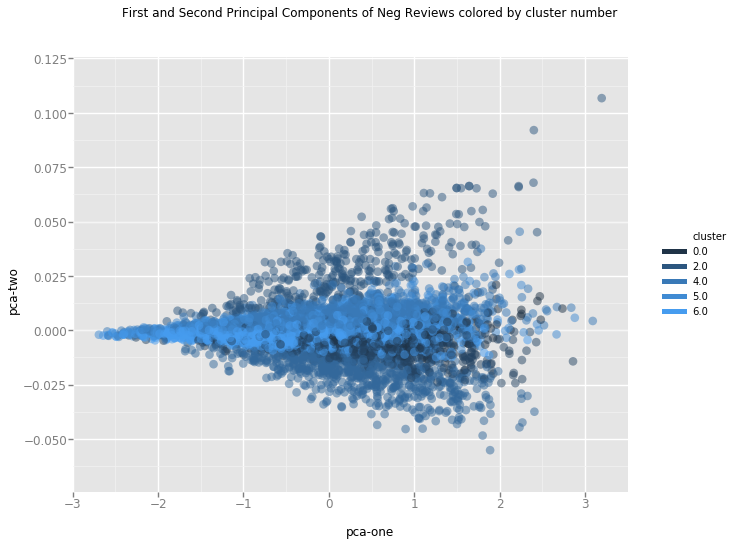

<ggplot: (-9223372029286519166)>

In [74]:
%matplotlib inline
import matplotlib
from ggplot import *

chart = ggplot(df_neg, aes(x='pca-one', y='pca-two', color='cluster')) \
        + geom_point(size=75,alpha=0.5) \
        + ggtitle("First and Second Principal Components of Neg Reviews colored by cluster number")
chart

## First and Second Principal Components of Neg Reviews colored by cluster number

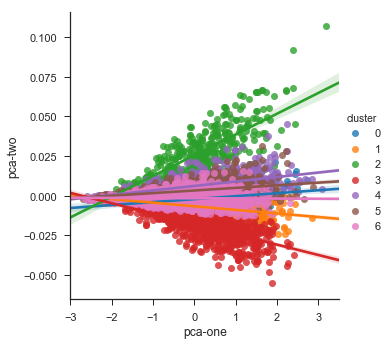

In [75]:
import seaborn as sns

sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot("pca-one", "pca-two", df_neg, hue = "cluster")

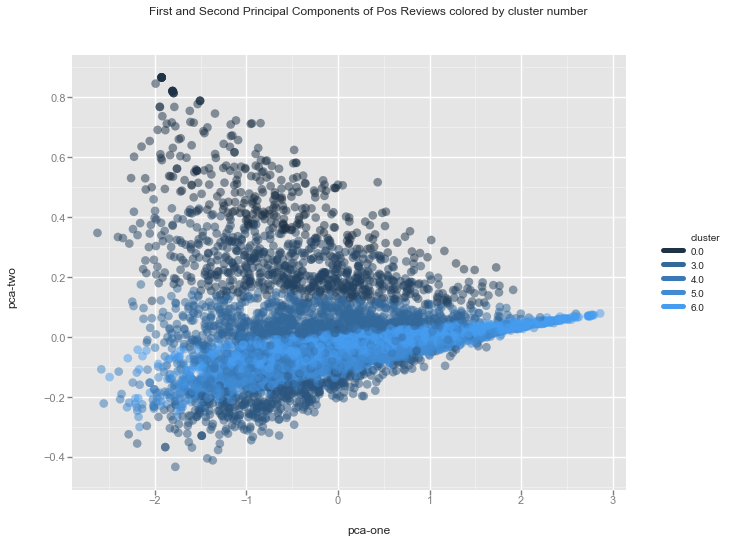

<ggplot: (-9223372029828017436)>

In [76]:
chart = ggplot(df_pos, aes(x='pca-one', y='pca-two', color='cluster')) \
        + geom_point(size=75,alpha=0.5) \
        + ggtitle("First and Second Principal Components of Pos Reviews colored by cluster number")
chart

## First and Second Principal Components of Pos Reviews colored by cluster number

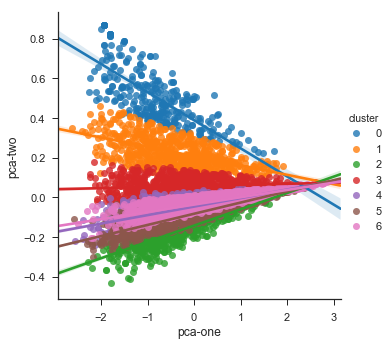

In [77]:
sns.lmplot("pca-one", "pca-two", df_pos, hue = "cluster")

In [78]:
df_neg.shape, df_pos.shape

((6058, 20), (7450, 20))

In [79]:
import time
from sklearn.manifold import TSNE


time_start = time.time()
print("Perfoming t-SNE on the Neg reviews:")
tsne_neg = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results_neg = tsne_neg.fit_transform(X_neg)

print("Perfoming t-SNE on the Pos reviews:")
tsne_pos = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results_pos = tsne_pos.fit_transform(X_pos)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

Perfoming t-SNE on the Neg reviews:
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 6058 samples in 0.051s...
[t-SNE] Computed neighbors for 6058 samples in 1.174s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6058
[t-SNE] Computed conditional probabilities for sample 2000 / 6058
[t-SNE] Computed conditional probabilities for sample 3000 / 6058
[t-SNE] Computed conditional probabilities for sample 4000 / 6058
[t-SNE] Computed conditional probabilities for sample 5000 / 6058
[t-SNE] Computed conditional probabilities for sample 6000 / 6058
[t-SNE] Computed conditional probabilities for sample 6058 / 6058
[t-SNE] Mean sigma: 0.012483
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.056194
[t-SNE] Error after 300 iterations: 1.377816
Perfoming t-SNE on the Pos reviews:
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 7450 samples in 0.032s...
[t-SNE] Computed neighbors for 7450 samples in 2.902s...
[t-SNE] Computed conditional p

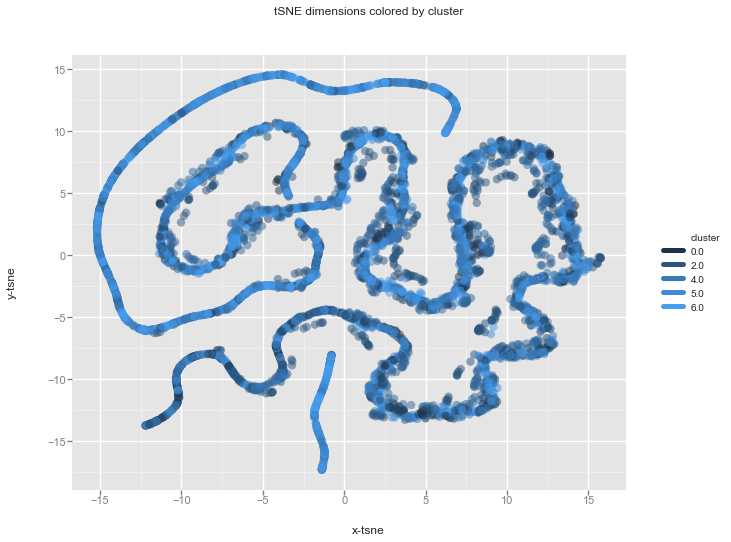

<ggplot: (-9223372029825786827)>

In [80]:

df_neg['x-tsne'] = tsne_results_neg[:,0]
df_neg['y-tsne'] = tsne_results_neg[:,1]

chart = ggplot( df_neg, aes(x='x-tsne', y='y-tsne', color='cluster') ) \
        + geom_point(size=70,alpha=0.5) \
        + ggtitle("tSNE dimensions colored by cluster")
chart

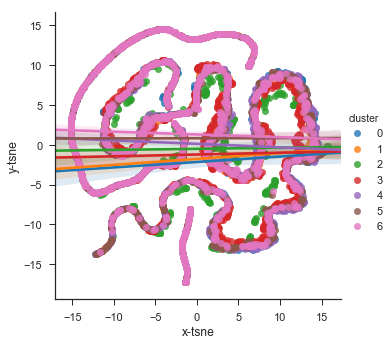

In [82]:
sns.lmplot("x-tsne", "y-tsne", df_neg, hue = "cluster")

In [83]:
df_neg.head()

,Unnamed: 0,url,Rating,Review_Title,User_Nb_Reviews,User_Name,User_Country,Review_Date,Trip_Verified,Airline_Name,...,Cabin_Flown,Date Flown,Recommended,tokennized_review_sen,avg_sen_vec,cluster,pca-one,pca-two,x-tsne,y-tsne
1,0,http://www.airlinequality.com/airline-reviews/...,1,"""disorganized and inefficient""",NaN,A Adam,United States,26th May 2018,Trip Verified,indigo-airlines,...,Economy Class,May 2018,no,"[most, disorganized, inefficient, travelled]","[-0.002481424387951847, -0.012767379288561642,...",6,-2.043241,-0.000803,-1.579308,-14.297469
6,1,http://www.airlinequality.com/airline-reviews/...,1,"""an excess baggage of 5kg""",NaN,J Masim,India,20th May 2018,Trip Verified,indigo-airlines,...,Economy Class,May 2018,no,"[check, staff, unprofessional, impolite]","[-0.007787830691086128, -0.06116062274668366, ...",0,0.626929,0.005521,11.453966,-1.920147
8,1,http://www.airlinequality.com/airline-reviews/...,1,"""an excess baggage of 5kg""",NaN,J Masim,India,20th May 2018,Trip Verified,indigo-airlines,...,Economy Class,May 2018,no,"[took, baggage, repack, leaving, check]","[-0.01101216480601579, -0.06777059379965067, 0...",0,1.019220,-0.005880,1.923577,-10.227522
9,1,http://www.airlinequality.com/airline-reviews/...,1,"""an excess baggage of 5kg""",NaN,J Masim,India,20th May 2018,Trip Verified,indigo-airlines,...,Economy Class,May 2018,no,"[coming, repacking, struggle, check, staff, ke...","[-0.008679024157269547, -0.05523624309959511, ...",5,0.302102,0.001887,7.053651,1.954963
12,7,http://www.airlinequality.com/airline-reviews/...,1,"""Please improve your service""",NaN,S Jabathra,India,27th April 2018,Trip Verified,indigo-airlines,...,Economy Class,April 2018,no,"[fare, extra, luggage, high]","[-0.010186947358306497, -0.05885574407875538, ...",4,0.723870,0.013506,12.907777,-7.162949


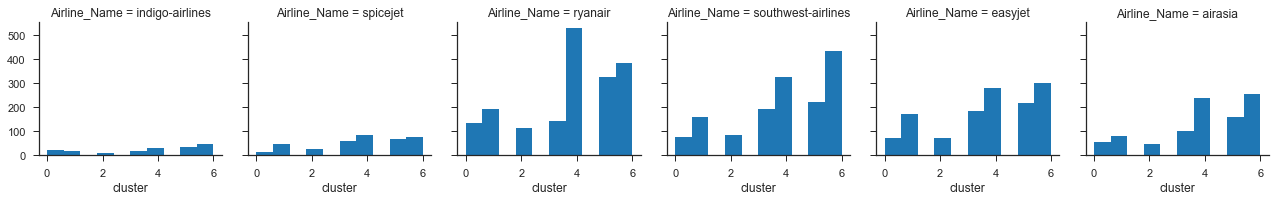

In [85]:
import matplotlib.pyplot as plt
g = sns.FacetGrid(df_neg,  col="Airline_Name")
g = g.map(plt.hist, "cluster")

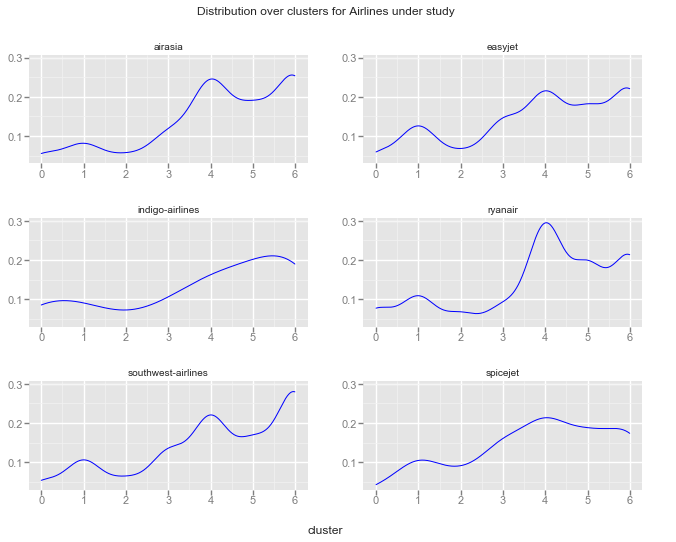

<ggplot: (7573173659)>

In [96]:
plot = ggplot( df_neg, aes(x='cluster', ) ) + geom_density(color = 'blue') \
+ facet_wrap('Airline_Name')  \
+ ggtitle("Distribution over clusters for Airlines under study")
plot

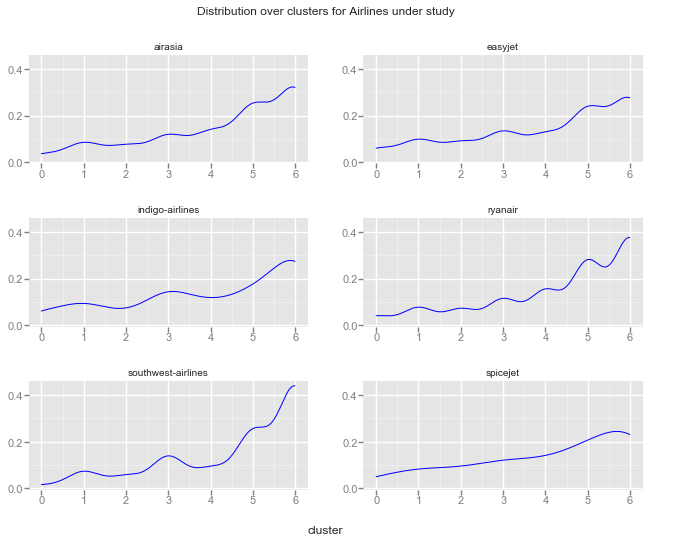

<ggplot: (7575361961)>

In [97]:
plot = ggplot( df_pos, aes(x='cluster', ) ) + geom_density(color = 'blue') \
+ facet_wrap('Airline_Name')  \
+ ggtitle("Distribution over clusters for Airlines under study")
plot